# What is Linear Discriminant Analysis?

Linear Discriminant Analysis(LDA) is a very common technique used for supervised classification problems.Lets understand together what is LDA and how does it work.

Linear Discriminant Analysis is a dimensionality reduction technique used as a preprocessing step in Machine Learning and pattern classification applications.

The main goal of dimensionality reduction techinques is to reduce the dimensions by removing the reduntant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions.

Linear Discriminant Analysis is a supervised classification technique which takes labels into consideration.This category of dimensionality reduction is used in biometrics,bioinformatics and chemistry.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10, 10))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset into a pandas dataframe
df = pd.read_csv("Wine.csv")

In [3]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [4]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


<h4>So Dependent Variable of the dataset is splitted into 3 classes namely(1, 2, 3)</h4>

In [5]:
df.shape

(178, 14)

In [6]:
X = df.iloc[:, 0:13].values
Y = df.iloc[:, 13].values

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [8]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (142, 13)
Size of X_test: (36, 13)
Size of Y_train: (142,)
Size of Y_test: (36,)


In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Applying PCA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

In [11]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#Predicting The Results
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [13]:
#Comparing the results
cm = confusion_matrix(Y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [14]:
#Checking The Accuracy score
acc = accuracy_score(Y_test, y_pred)
print("The Accuracy on the model is: {}%".format((acc*100).astype('int32')))

The Accuracy on the model is: 100%


<h3>Building a text report showing the main classification metrics</h3>

In [15]:
cr = classification_report(Y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        16
          3       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        36



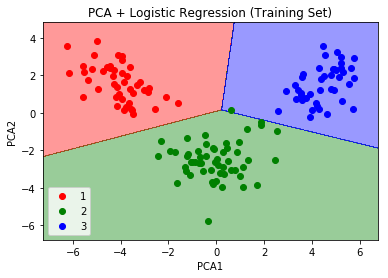

In [16]:
# Visualising the Training set results
x_set, y_set = X_train, Y_train

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green', 'blue')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), 
                label = j
               )
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("PCA + Logistic Regression (Training Set)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

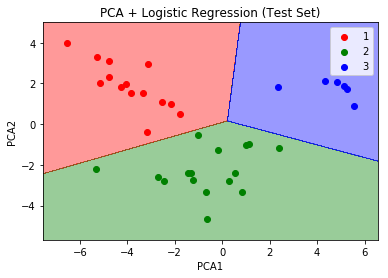

In [17]:
# Visualising the Test set results
x_set, y_set = X_test, Y_test

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green', 'blue')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), 
                label = j
               )
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("PCA + Logistic Regression (Test Set)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()